In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
import spacy
from wordcloud import WordCloud
!pip install spacy

In [25]:
from google.colab import files
uploaded  = files.upload()

Saving tweet_emotions.csv to tweet_emotions (2).csv


In [32]:
df = pd.read_csv('/content/tweet_emotions.csv')

In [33]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB
None


,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


The dataset consists of


*   tweet_id: A unique identifier for each tweet (not useful for modeling).
*   sentiment: The target variable, representing the emotion of the tweet.
*   content: The actual tweet text, which we will preprocess for model training.


**Data Preprocessing**

1.   Removing special characters, links, and mentions (@username).
2.   Converting text to lowercase.
3.   Removing stopwords and performing tokenization.
4.   Applying lemmatization for better feature extraction.



In [44]:
# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

In [45]:
# Function for cleaning tweets
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    # Tokenize using SpaCy
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    return " ".join(tokens)

In [47]:
# Apply cleaning to the dataset
df["cleaned_content"] = df["content"].apply(clean_text)

# Display some cleaned text samples
df[["content", "cleaned_content"]].head()

,content,cleaned_content
0,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit early start freakin
1,Layin n bed with a headache ughhhh...waitin o...,layin n bed headache ughhhhwaitin
2,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday
3,wants to hang out with friends SOON!,want hang friend soon
4,@dannycastillo We want to trade with someone w...,want trade houston ticket


**EDA**

In [52]:
!pip install matplotlib seaborn wordcloud spacy

In [54]:
print(df.head())
print(df.isnull().sum())
print(df.info())

     tweet_id   sentiment                                            content  \
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...   
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...   
2  1956967696     sadness                Funeral ceremony...gloomy friday...   
3  1956967789  enthusiasm               wants to hang out with friends SOON!   
4  1956968416     neutral  @dannycastillo We want to trade with someone w...   

                                   cleaned_content  
0    know   listenin bad habit early start freakin  
1              layin n bed headache   ughhhhwaitin  
2                    funeral ceremonygloomy friday  
3                            want hang friend soon  
4                        want trade houston ticket  
tweet_id           0
sentiment          0
content            0
cleaned_content    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 column

In [70]:
# Check for missing values
print(df.isnull().sum())

tweet_id           0
sentiment          0
content            0
cleaned_content    0
tweet_length       0
dtype: int64


**Sentiment Distribution**

<ipython-input-55-871b5cc3adca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment", order=df["sentiment"].value_counts().index, palette="viridis")


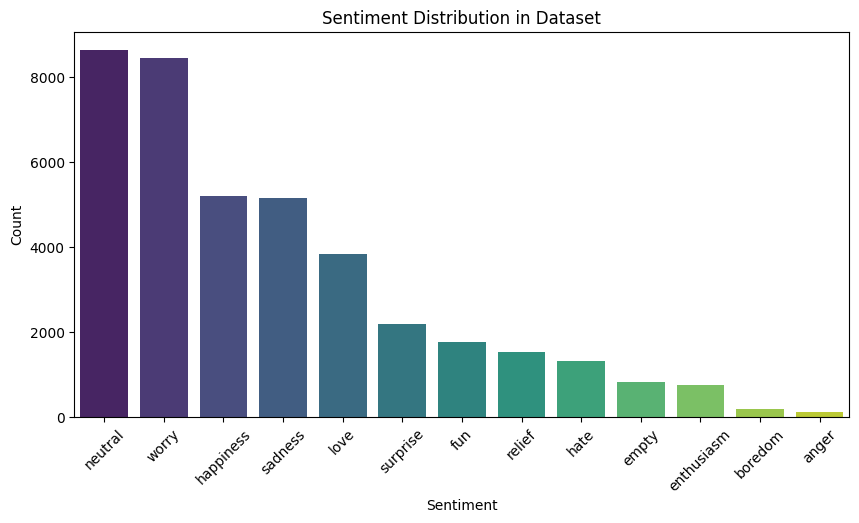

In [55]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="sentiment", order=df["sentiment"].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution in Dataset")
plt.show()

**Word Cloud for Common Words**

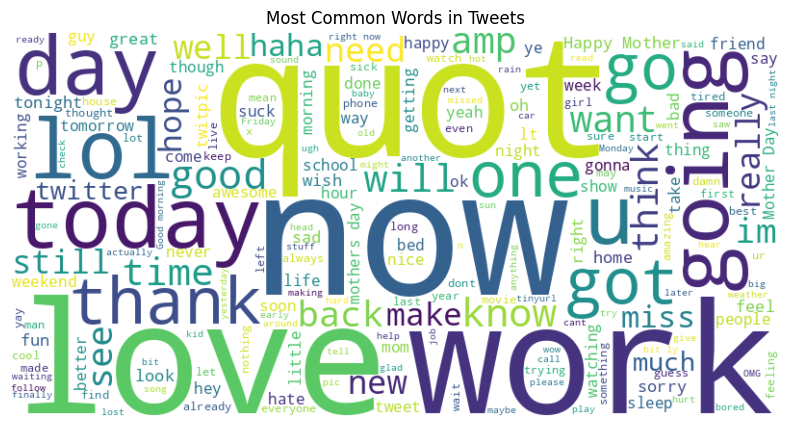

In [57]:
# Combine all tweets into a single text
all_text = " ".join(df["content"].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(all_text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Tweets")
plt.show()

**1. Sentiment Distribution:**

*   The dataset has the highest number of neutral and worry tweets.
*   Happiness, sadness, and love are also prominent emotions.





**2. Word Cloud:**


*   Shows the most frequent words in tweets. Common words include terms reflecting emotions and daily activities.



**Tweet Length Distribution**

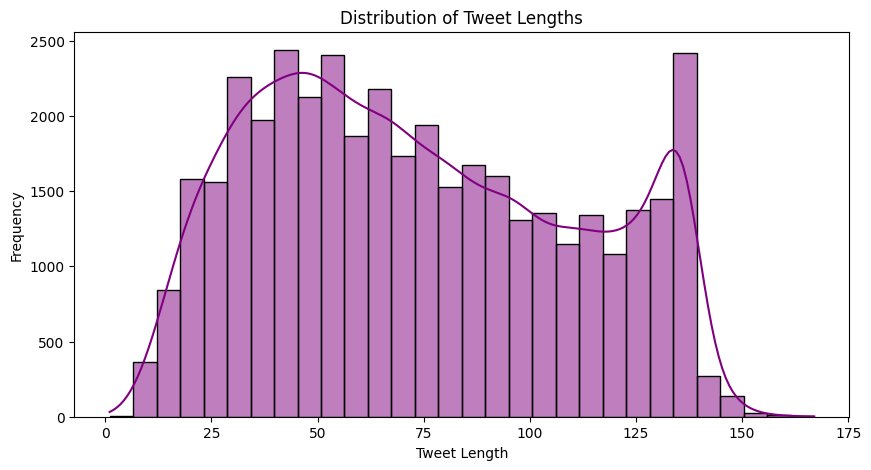

In [58]:
df["tweet_length"] = df["content"].apply(len)

# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["tweet_length"], bins=30, kde=True, color="purple")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.title("Distribution of Tweet Lengths")
plt.show()

**Tweet Length Distribution by Sentiment**

<ipython-input-68-677ca7b4ef8b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="sentiment", y="tweet_length", palette="coolwarm")


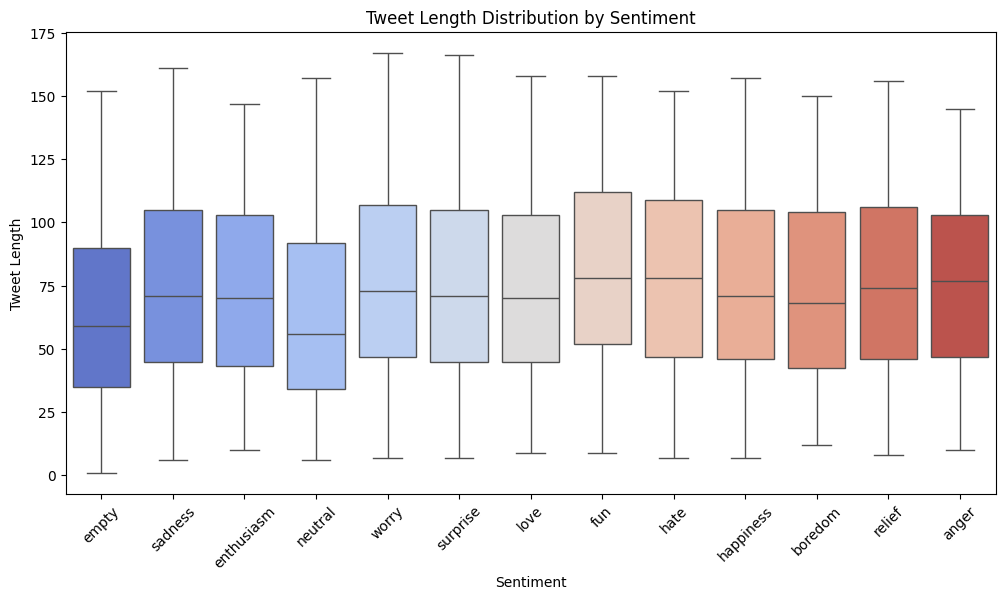

In [68]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="sentiment", y="tweet_length", palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Sentiment")
plt.ylabel("Tweet Length")
plt.title("Tweet Length Distribution by Sentiment")
plt.show()


Most Common Words per Sentiment

In [69]:
from collections import Counter

# Function to get most common words for each sentiment
def get_most_common_words(sentiment, num_words=10):
    text = " ".join(df[df["sentiment"] == sentiment]["content"].astype(str))
    words = text.split()
    word_counts = Counter(words)
    return word_counts.most_common(num_words)

# Display most common words for a few sentiment categories
for sentiment in ["happy", "sadness", "worry", "love"]:
    print(f"Most common words in {sentiment} tweets: {get_most_common_words(sentiment)}\n")


Most common words in happy tweets: []

Most common words in sadness tweets: [('to', 1997), ('I', 1959), ('the', 1635), ('a', 1159), ('my', 1133), ('i', 1065), ('and', 985), ('is', 770), ('in', 716), ('of', 611)]

Most common words in worry tweets: [('I', 3335), ('to', 3333), ('the', 2597), ('a', 2112), ('my', 1788), ('i', 1574), ('and', 1454), ('is', 1253), ('in', 1164), ('you', 1106)]

Most common words in love tweets: [('to', 1218), ('I', 1198), ('the', 1189), ('a', 875), ('you', 773), ('my', 739), ('love', 664), ('i', 654), ('and', 633), ('for', 519)]

